In [63]:
import pandas as pd;
import numpy as np;

df_orig = pd.read_csv('../data/full_dataset_unscaled.csv', index_col=0);
df_orig.reset_index(inplace = True)
df_orig.head()

,zip,City,State,Metro,CountyName,zri,year,month,datetime,percent_white,...,apartment for rent,studio for rent,1 bedroom for rent,3 bedroom for rent,starbucks,total_firms,job_creation_rate,job_destruction_rate,startup_firms,state_local_perc
0,1013,Chicopee,MA,Springfield,Hampden County,946.0,2015,1,2015-01-01,0.714892,...,-1.390248,-1.181638,-0.872013,-1.100628,-1.712329,7340.000000,10.221000,8.228000,383.0,0.176793
1,1013,Chicopee,MA,Springfield,Hampden County,950.0,2015,2,2015-02-01,0.715367,...,-0.050671,0.701568,0.097872,-1.100628,-1.241616,7335.583333,10.078917,8.328083,382.0,0.176313
2,1013,Chicopee,MA,Springfield,Hampden County,958.0,2015,3,2015-03-01,0.715842,...,-0.172450,-0.475436,-0.872013,-1.100628,-1.268533,7331.166667,9.936833,8.428167,381.0,0.175832
3,1013,Chicopee,MA,Springfield,Hampden County,958.0,2015,4,2015-04-01,0.716318,...,0.314669,-1.181638,-0.872013,-1.100628,-0.743268,7326.750000,9.794750,8.528250,380.0,0.175352
4,1013,Chicopee,MA,Springfield,Hampden County,955.0,2015,5,2015-05-01,0.716793,...,-1.755587,-1.181638,-0.872013,-0.049096,-0.248671,7322.333333,9.652667,8.628333,379.0,0.174872


In [64]:
pd.set_option('display.max_columns', 300);
pd.set_option('display.max_rows', 300);

In [65]:
df_orig = df_orig.rename(columns={"datetime":"year-month"})
df_orig['net_job_rate']=df_orig['job_creation_rate']-df_orig['job_destruction_rate']
df_orig['apartment_for_rent_searches'] = df_orig[['apartment for rent','studio for rent','1 bedroom for rent','3 bedroom for rent']].sum(axis=1)
df_orig['multifamily_for_rent_searches'] = df_orig[['townhomes for rent','townhouse for rent','house for rent','duplex apartments for rent','condos for rent']].sum(axis=1)
df_orig['gun_searches'] = df_orig[['gun range', 'gun control', 'gun violence']].sum(axis=1)

In [66]:
gen_cols = ['zip',
 'City',
 'State',
 'Metro',
 'CountyName',
 'zri',
 'year',
 'month',
 'year-month']
acs_cols = ['percent_white',
 'percent_black',
 'percent_asian',
 'percent_hispanic',
 'percent_native_am',
 'percent_other_race',
 'percent_0_17',
 'percent_18_39',
 'percent_40_64',
 'percent_65+',
 'percent_rental_units_vacant',
 'percent_rental_units_occupied',
 'percent_graduate_deg',
 'percent_bachelors',
 'percent_associates',
 'percent_highschool',
 'percent_less_highschool',
 'percent_commute_public_transport',
 'percent_commute_less_30',
 'percent_buildings_less_10_units',
 'percent_buildings_10_19_units',
 'percent_buildings_20_49_units',
 'percent_buildings_50+_units',
 'percent_commute_30_to_59',
 'percent_commute_60_to_89',
 'percent_commute_90_more',
 'percent_new_city',
 'percent_new_unit',
 'percent_units_owner_occupied',
 'median_building_age',
 'income_per_capita',
 'poverty_rate',
 'total_pop',
 'percent_workforce_unemployed',
 'percent_work_from_home',
 'median_age',
 'percent_female',
 'gini_index',
 'percent_not_us_citizen']
acs_cols_remove=['percent_other_race','percent_40_64','percent_0_17','percent_18_39',
       'percent_65+','percent_rental_units_vacant','percent_not_us_citizen','percent_less_highschool', 'percent_buildings_less_10_units',
 'percent_commute_30_to_59',
 'percent_commute_60_to_89',
 'percent_commute_90_more', 'percent_commute_less_30','percent_graduate_deg',
                'percent_female','gini_index','percent_hispanic','percent_black','percent_bachelors',
                 'percent_asian','percent_new_city','percent_new_unit']
acs_cols_keep=list(set(acs_cols) - set(acs_cols_remove))
bikeshare_cols = ['bs_total_stations',
 'bs_total_systems',
 'has_bike_sharing']
bikeshare_cols_remove=['has_bike_sharing','bs_total_systems']
bikeshare_cols_keep=list(set(bikeshare_cols) - set(bikeshare_cols_remove))
trends_cols = ['gun range',
 'gun control',
 'gun violence',
 'job opportunities',
 'unemployment',
 'retirement',
 'layoff',
 'lgbt',
 'same sex marriage',
 'they',
 'pronouns',
 'black lives matter',
 'political correctness',
 'make america great again',
 'euthanasia',
 'getaway',
 'places to go',
 'flight tickets',
 'twitter',
 'hashtag',
 'fake news',
 'hurricane',
 'wildfire',
 'flood',
 'fire',
 "trader joe's",
 'whole foods',
 'lululemon',
 'thrift',
 'condos for rent',
 'duplex apartments for rent',
 'townhomes for rent',
 'townhouses for rent',
 'home for rent',
 'house for rent',
 'townhome for rent',
 'townhouse for rent',
 'apartment for rent',
 'studio for rent',
 '1 bedroom for rent',
 '3 bedroom for rent',
 'starbucks',
  'apartment_for_rent_searches',
  'multifamily_for_rent_searches',
  'gun_searches']
trends_cols_remove=['they','apartment for rent','studio for rent','1 bedroom for rent',
                    '3 bedroom for rent', 'townhome for rent','townhouse for rent','townhomes for rent',
                    'townhouses for rent','house for rent','home for rent','duplex apartments for rent','condos for rent',
                   'gun range', 'gun control', 'gun violence','homes for rent']
trends_cols_keep=list(set(trends_cols) - set(trends_cols_remove))
economic_cols = ['total_firms',
 'job_creation_rate',
 'job_destruction_rate',
 'startup_firms','state_local_perc', 'net_job_rate']
economic_cols_remove=['total_firms', 'job_creation_rate','job_destruction_rate']
economic_cols_keep=list(set(economic_cols) - set(economic_cols_remove))

In [67]:
df = df_orig[gen_cols + acs_cols_keep + bikeshare_cols_keep + trends_cols_keep + economic_cols_keep];

In [68]:
df.to_csv("../data/full_dataset_engineered.csv", index = False)

In [70]:
df_orig = pd.read_csv('../data/full_dataset_engineered.csv', index_col=0);
df_orig

,City,State,Metro,CountyName,zri,year,month,year-month,median_building_age,percent_highschool,percent_buildings_10_19_units,percent_native_am,total_pop,percent_associates,percent_white,poverty_rate,percent_buildings_50+_units,percent_work_from_home,median_age,percent_commute_public_transport,percent_workforce_unemployed,percent_buildings_20_49_units,income_per_capita,percent_units_owner_occupied,percent_rental_units_occupied,bs_total_stations,lululemon,job opportunities,multifamily_for_rent_searches,black lives matter,pronouns,retirement,getaway,fake news,political correctness,same sex marriage,thrift,trader joe's,hurricane,hashtag,euthanasia,unemployment,twitter,wildfire,flood,starbucks,whole foods,gun_searches,flight tickets,make america great again,places to go,lgbt,apartment_for_rent_searches,fire,layoff,startup_firms,net_job_rate,state_local_perc
zip,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1013,Chicopee,MA,Springfield,Hampden County,946.0,2015,1,2015-01-01,62.333333,0.383459,0.030202,0.000113,21846.25,0.257328,0.714892,0.199214,0.049514,0.014618,36.508333,0.022609,0.105077,0.036863,20935.750000,0.423344,0.942265,0.0,-0.212701,0.096863,-0.259098,-0.509999,-1.326593,-1.425905,-0.468627,-0.659443,0.0,-0.588436,-0.377642,-0.662346,-0.285509,0.448996,-0.150792,3.466751,1.004233,-0.443099,0.944722,-1.712329,0.291193,-3.278835,-1.378408,-0.514772,-1.304734,-0.141562,-4.544528,1.162014,-0.823717,383.0,1.993000,0.176793
1013,Chicopee,MA,Springfield,Hampden County,950.0,2015,2,2015-02-01,62.666667,0.385186,0.030477,0.000226,21870.50,0.255708,0.715367,0.196885,0.049557,0.014466,36.416667,0.023198,0.105835,0.036368,20931.500000,0.421607,0.942497,0.0,0.157345,1.061035,-0.765415,-0.509999,-1.326593,-1.217118,0.019798,-0.659443,0.0,-0.588436,-0.826044,0.435704,-0.431227,0.448996,-0.150792,1.934232,1.303017,-0.443099,-1.199445,-1.241616,0.719432,1.929184,-0.847070,-0.514772,-0.015282,-1.071717,-0.351858,0.225152,-0.823717,382.0,1.750833,0.176313
1013,Chicopee,MA,Springfield,Hampden County,958.0,2015,3,2015-03-01,63.000000,0.386912,0.030752,0.000339,21894.75,0.254088,0.715842,0.194555,0.049601,0.014314,36.325000,0.023787,0.106592,0.035873,20927.250000,0.419870,0.942730,0.0,-0.952793,-0.385223,-0.336470,-0.509999,0.732224,0.348785,-0.794244,0.570434,0.0,-0.086484,-0.527109,-0.662346,-0.285509,0.448996,1.382217,0.991144,1.751194,-0.443099,-0.127361,-1.268533,0.230016,0.951713,-0.847070,-0.514772,-1.304734,-1.536795,-2.620528,1.295851,-0.823717,381.0,1.508667,0.175832
1013,Chicopee,MA,Springfield,Hampden County,958.0,2015,4,2015-04-01,63.333333,0.388639,0.031027,0.000452,21919.00,0.252468,0.716318,0.192226,0.049644,0.014162,36.233333,0.024375,0.107350,0.035378,20923.000000,0.418133,0.942962,0.0,-0.582747,-1.349394,-0.765415,-0.509999,-1.326593,-0.799544,-1.282668,-0.659443,0.0,-0.588436,-0.377642,1.533754,-0.358368,0.448996,-0.150792,1.462688,2.348763,-0.443099,-0.127361,-0.743268,1.086494,-0.167832,-0.847070,-0.514772,-1.820515,-1.071717,-2.839611,0.760502,-0.823717,380.0,1.266500,0.175352
1013,Chicopee,MA,Springfield,Hampden County,955.0,2015,5,2015-05-01,63.666667,0.390365,0.031302,0.000565,21943.25,0.250848,0.716793,0.189897,0.049687,0.014010,36.141667,0.024964,0.108107,0.034883,20918.750000,0.416396,0.943195,0.0,-0.336049,0.578949,-1.673442,-0.509999,-1.326593,0.661965,-1.119860,0.570434,0.0,-0.086484,-0.975511,-0.296329,-0.285509,-1.393660,-1.172798,1.875289,1.153625,3.266281,0.944722,-0.248671,-0.198223,0.725700,-0.581401,-0.514772,0.500500,0.788593,-3.858335,1.162014,-0.823717,379.0,1.024333,0.174872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99654,Wasilla,AK,Anchorage,Matanuska Susitna Borough,1277.0,2019,8,2019-08-01,22.333333,0.330924,0.017088,0.049727,60057.00,0.404931,0.796036,0.094625,0.002284,0.049199,33.566667,0.010165

In [27]:
df_col = df_orig.columns

In [25]:
mo_col = ['zip', 'City', 'State', 'Metro', 'CountyName', 'zri', 'year', 'month',
       'datetime', 'percent_white', 'percent_native_am',
       'percent_rental_units_occupied', 'percent_associates',
       'percent_highschool', 'percent_commute_public_transport',
       'percent_buildings_10_19_units', 'percent_buildings_20_49_units',
       'percent_buildings_50+_units', 'percent_units_owner_occupied',
       'median_building_age', 'income_per_capita', 'poverty_rate', 'total_pop',
       'percent_workforce_unemployed', 'percent_work_from_home', 'median_age',
       'bs_total_stations', 'job opportunities', 'unemployment', 'retirement',
       'layoff', 'lgbt', 'same sex marriage', 'pronouns', 'black lives matter',
       'political correctness', 'make america great again', 'euthanasia',
       'getaway', 'places to go', 'flight tickets', 'twitter', 'hashtag',
       'fake news', 'hurricane', 'wildfire', 'flood', 'fire', 'trader joe\'s',
       'whole foods', 'lululemon', 'thrift', 'starbucks', 'startup_firms',
       'state_local_perc', 'year-month', 'net_job_rate',
       'apartment_for_rent_searches', 'multifamily_for_rent_searches',
       'gun_searches'];
len(mo_col)

60

In [ ]:
for x in df_col:
    if x not in mo_col: print(x)

### Code for merging feature importance csv files and graph drawing

In [38]:
import pandas as pd;
import numpy as np;

file_list = ["./Results in CSV files/Importance_0_100.csv",
             "./Results in CSV files/Importance_100_200.csv",
             "./Results in CSV files/Importance_200_300.csv",
             "./Results in CSV files/Importance_300_375.csv",
             "./Results in CSV files/Importance_375_450.csv",
             "./Results in CSV files/Importance_450_550.csv",
             "./Results in CSV files/Importance_550_650.csv",
             "./Results in CSV files/Importance_650_750.csv",
             "./Results in CSV files/Importance_750_900.csv",
             "./Results in CSV files/Importance_900_950.csv",
             "./Results in CSV files/Importance_950_1100.csv",
             "./Results in CSV files/Importance_1100_1200.csv",
             "./Results in CSV files/Importance_1200_1301.csv",
            ];

df = pd.read_csv(file_list[0], index_col=0)

In [39]:
for i in range(1, len(file_list)):
    df = pd.concat([df, pd.read_csv(file_list[i], index_col=0)]);

In [43]:
stats = pd.DataFrame({"Feature": df.columns, "Importance": df.mean()});
stats.reset_index(drop = True, inplace = True);

stats.drop([0], axis = 0, inplace = True);

In [44]:
ranking = stats.sort_values("Importance", ascending = False).head(15);

In [45]:
ranking

,Feature,Importance
50,state_local_perc,0.030776
5,percent_buildings_50+_units,0.027102
8,income_per_capita,0.020315
12,percent_white,0.019234
11,poverty_rate,0.017833
48,net_job_rate,0.016842
10,percent_buildings_10_19_units,0.014850
49,startup_firms,0.011048
6,median_building_age,0.009180
16,percent_workforce_unemployed,0.008783


In [46]:
category = ["Economic", "ACS", "ACS", "ACS", "ACS", "Economic", "ACS", "Economic",
           "ACS", "ACS", "ACS", "ACS", "ACS", "Google Trends", "Google Trends"];
feature_name = ["State Local Income Tax Percentage", "Percent Buildings 50+ Units",
               "Income per Capita", "Percent White", "Poverty Rate",
                "Net Job Creation Rate", "Percentage Buildings 10-19 Units", 
               "Startup Firms", "Medium Building Age", "Percent Workforce Unemployed",
               "Percent Highschool", "Percent Units Owner Occupied",
               "Percent Commute Publit Transport", "Fake News", "Twitter"]

In [47]:
ranking["Data Source"] = category

In [48]:
ranking["Top Feature"] = feature_name
ranking

,Feature,Importance,Data Source,Top Feature
50,state_local_perc,0.030776,Economic,State Local Income Tax Percentage
5,percent_buildings_50+_units,0.027102,ACS,Percent Buildings 50+ Units
8,income_per_capita,0.020315,ACS,Income per Capita
12,percent_white,0.019234,ACS,Percent White
11,poverty_rate,0.017833,ACS,Poverty Rate
48,net_job_rate,0.016842,Economic,Net Job Creation Rate
10,percent_buildings_10_19_units,0.014850,ACS,Percentage Buildings 10-19 Units
49,startup_firms,0.011048,Economic,Startup Firms
6,median_building_age,0.009180,ACS,Medium Building Age
16,percent_workforce_unemployed,0.008783,ACS,Percent Workforce Unemployed


In [51]:
!pip install seaborn

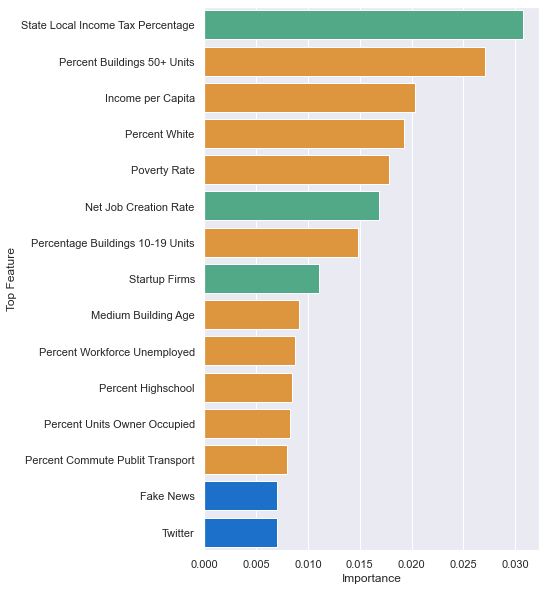

In [59]:
palette ={"ACS": "#F79824", "Google Trends": "#006FE6",
          "Economic": "#44B78B", "Bike Share": "#D1495B"};

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = "Importance", y = "Top Feature", data = ranking.sort_values(by='Importance',ascending=False),
           hue="Data Source",dodge=False,palette= palette)
sns.set(rc={'figure.figsize':(10,6)})
plt.legend([],[], frameon=False)

In [62]:
df.to_csv("./Results in CSV files/Feature_Importance.csv", index = False)